In [2]:
import axelrod as axl

In [3]:
import pandas as pd

from keras.models import load_model

Using TensorFlow backend.
//anaconda3/envs/rnn/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
//anaconda3/envs/rnn/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
//anaconda3/envs/rnn/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
//anaconda3/envs/rnn/lib/python3.6/site-packages/tensorflow/py

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

**Padded classification**

In [6]:
model = load_model('output_basic_tournament/basic/output_padded/model-over-time.h5')





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
input_lenght = 204

In [8]:
test_input  = np.array([2, 2, 2, 2, 2, 2, 2, 2, 2] + [0 for _ in range(input_lenght - 9)] )
test_input = test_input.reshape((1, input_lenght))

In [9]:
output = model.predict(test_input)

In [10]:
axl.Action(round(output.max()))

D

In [11]:
from axelrod.random_ import random_choice

C, D = axl.Action.C, axl.Action.D

class LSTMPlayer(axl.Player):
    name = "The LSTM homie"
    classifier = {
        "memory_depth": float("inf"),
        "stochastic": False,
        "inspects_source": False,
        "manipulates_source": False,
        "manipulates_state": False,
    }

    def __init__(self, model, reshape_history_funct, opening_probability=0.70, input_length=False):
        self.model = model
        self.opening_probability = opening_probability
        self.reshape_history_function = reshape_history_funct
        if input_length:
            self.input_length = input_length
        super().__init__()

    def strategy(self, opponent):
        if len(self.history) == 0:
            return random_choice(self.opening_probability)

        current_length = len(opponent.history)
        history = [action.value for action in opponent.history]

        prediction = self.model.predict(self.reshape_history_function(history, self.input_length))
        
        return axl.Action(round(prediction.max()))

    def __repr__(self):
        return self.name

In [12]:
def reshape_history_padded_model(history, input_length):

    length_history = len(history)
    history = np.where(np.array(history)==0, 2, history)
    
    if length_history > input_length:
        inputs = np.array(history[-input_length:])
    else:
        inputs = np.append(history, np.zeros((input_length - length_history, 1)))
    
    assert len(inputs) == input_length
    
    return np.array(inputs).reshape(1, len(inputs))

**Tournament**

In [13]:
player = LSTMPlayer(model, reshape_history_padded_model, input_length=204)

In [17]:
match = axl.Match([player, axl.Grudger()], turns=205)

In [18]:
_ = match.play()

In [19]:
match.result

[(C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 

In [20]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]

In [21]:
tournament = axl.Tournament(players=strategies_tournament, turns=204, repetitions=50)

In [22]:
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/dask/base.py:835: UserWarning: The get= keyword has been deprecated. Please use the scheduler= keyword instead with the name of the desired scheduler like 'threads' or 'processes'
  warnings.warn("The get= keyword has been deprecated. "


//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


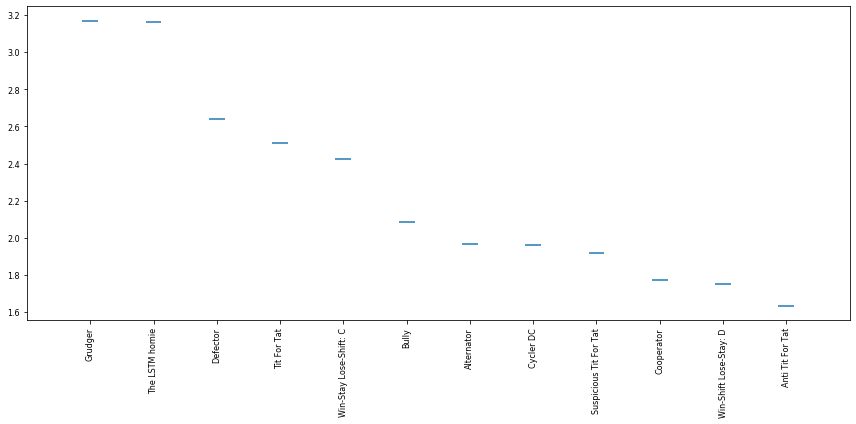

In [23]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

**classification**

In [24]:
classification = load_model('output_basic_tournament/basic/output_lstm_classification/model-over-time.h5')

In [25]:
test_input  = np.array([0, 1, 2])
test_input = test_input.reshape((1, 3, 1))

In [26]:
classification.predict(test_input)[0][-1][0]

0.69983095

In [27]:
def reshape_history_lstm_model(history):
    return np.array(history).reshape(1, len(history), 1)

In [28]:
from axelrod.random_ import random_choice

C, D = axl.Action.C, axl.Action.D

class LSTMPlayer(axl.Player):
    name = "The LSTM homie"
    classifier = {
        "memory_depth": float("inf"),
        "stochastic": False,
        "inspects_source": False,
        "manipulates_source": False,
        "manipulates_state": False,
    }

    def __init__(self, model, reshape_history_funct, opening_probability=0.70):
        self.model = model
        self.opening_probability = opening_probability
        self.reshape_history_function = reshape_history_funct
        super().__init__()

    def strategy(self, opponent):
        if len(self.history) == 0:
            return random_choice(self.opening_probability)

        history = [action.value for action in opponent.history]

        prediction = self.model.predict(self.reshape_history_function(history))
    

        return axl.Action(round(prediction[0][-1][0]))

    def __repr__(self):
        return self.name

In [29]:
player = LSTMPlayer(classification , reshape_history_lstm_model)

In [30]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]

In [31]:
tournament = axl.Tournament(players=strategies_tournament, turns=204, repetitions=1)

In [32]:
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


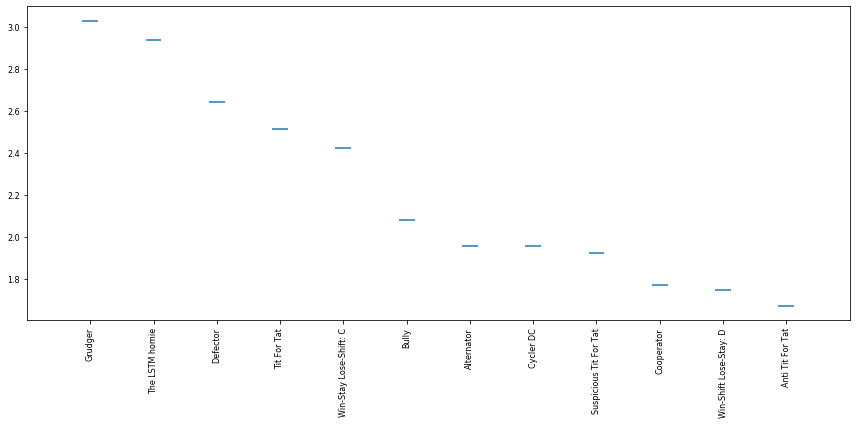

In [33]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

In [37]:
match = axl.Match([player, axl.Grudger()], turns=5)

In [38]:
_ = match.play()

In [39]:
match.result

[(C, C), (C, C), (C, C), (C, C), (C, C)]

In [40]:
valid = pd.read_csv('output_basic_tournament/basic/output_lstm_classification/validation_measures_run_100_1.csv',
                    index_col=0)

In [41]:
valid.columns

Index(['acc', 'val_acc', 'loss', 'val_loss'], dtype='object')

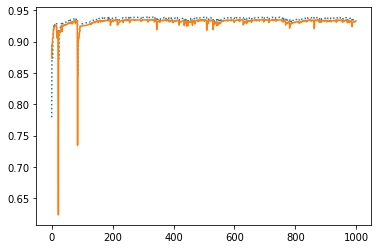

In [42]:
plt.plot(valid['acc'], ':')
plt.plot(valid['val_acc']);

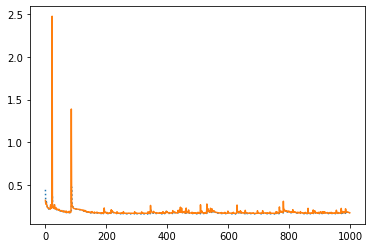

In [43]:
plt.plot(valid['loss'], ':')
plt.plot(valid['val_loss']);

In [44]:
classification = load_model('output_basic_tournament/basic/output_lstm_classification/final_lstm_model.h5')

In [45]:
player = LSTMPlayer(classification , reshape_history_lstm_model)

In [46]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]

In [47]:
tournament = axl.Tournament(players=strategies_tournament, turns=204, repetitions=10)

In [48]:
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


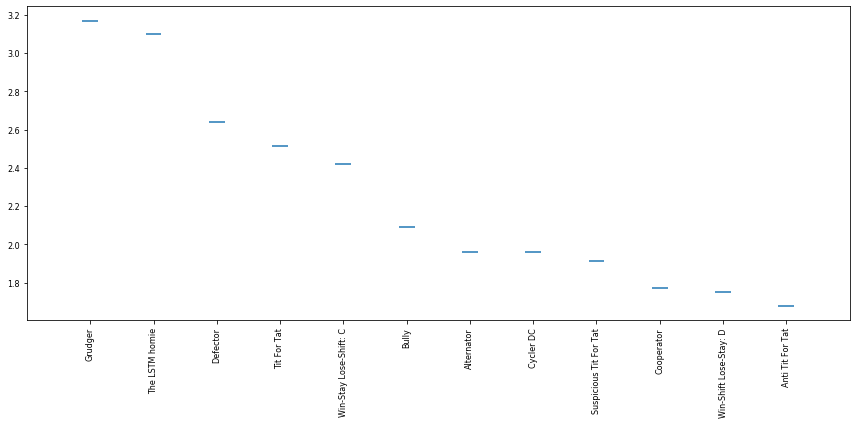

In [49]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()